# **Proposta de Trabalho 1 - Mineração de dados**

### **Professor:** Wagner Meira Jr.
### **Alunos:** Carlos Henrique Brito Malta Leão | Vinícius Alves de Faria Resende
### **Matrículas:** 2021039794 | 2021039972

### **Tema:** ENEM 2022: O Impacto das Características Socioeconômicas no Desempenho dos Candidatos
### **Base de dados:** https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem


In [2]:
# Bibliotecas usadas no projeto
import pandas as pd
import matplotlib.pyplot as plt

##**2. Data understanding (Entendimento dos dados)**


In [3]:
# Carregando a base de dados
raw_df = pd.read_csv('MICRODADOS_ENEM_2022.csv', encoding='latin-1', sep=';')

Não presentes ou eliminados ciências da natureza: 1120710 | 32.24%
Não presentes ou eliminados ciências humanas: 982663 | 28.27%
Não presentes ou eliminados linguagens e códigos: 982663 | 28.27%
Não presentes ou eliminados matemática: 1120710 | 32.24%
Não presentes ou eliminados em todas as provas:972091 | 27.96%
Não presentes ou eliminados em pelo menos uma prova: 1131282 | 32.54%


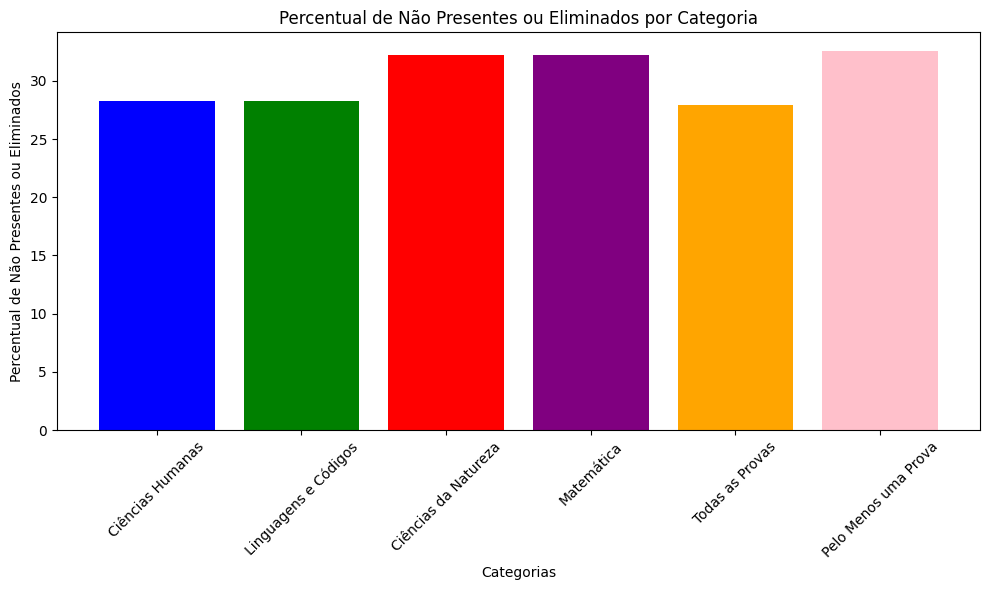

In [11]:
# Verifica a não presença ou eliminação de participantes
mask_cn = (raw_df['TP_PRESENCA_CN'] == 2) | (raw_df['TP_PRESENCA_CN'] == 0)
mask_ch = (raw_df['TP_PRESENCA_CH'] == 2) | (raw_df['TP_PRESENCA_CH'] == 0)
mask_lc = (raw_df['TP_PRESENCA_LC'] == 2) | (raw_df['TP_PRESENCA_LC'] == 0)
mask_mt = (raw_df['TP_PRESENCA_MT'] == 2) | (raw_df['TP_PRESENCA_MT'] == 0)

mask_combined_and = mask_cn & mask_ch & mask_lc & mask_mt
mask_combined_or = mask_cn | mask_ch | mask_lc | mask_mt

count_cn = mask_cn.sum()
count_ch = mask_ch.sum()
count_lc = mask_lc.sum()
count_mt = mask_mt.sum()

count_combined_and = mask_combined_and.sum()
count_combined_or = mask_combined_or.sum()

total_of_participants = len(raw_df)

def get_percentage(count):
  return (count / total_of_participants) * 100


print("Não presentes ou eliminados ciências da natureza: " + str(count_cn) + " | " + str(round(get_percentage(count_cn), 2)) + "%")
print("Não presentes ou eliminados ciências humanas: " + str(count_ch) + " | " + str(round(get_percentage(count_ch), 2)) + "%")
print("Não presentes ou eliminados linguagens e códigos: " + str(count_lc) + " | " + str(round(get_percentage(count_lc), 2)) + "%")
print("Não presentes ou eliminados matemática: " + str(count_mt) + " | " + str(round(get_percentage(count_mt), 2)) + "%")
print("Não presentes ou eliminados em todas as provas: " + str(count_combined_and) + " | " + str(round(get_percentage(count_combined_and), 2)) + "%")
print("Não presentes ou eliminados em pelo menos uma prova: " + str(count_combined_or) + " | " + str(round(get_percentage(count_combined_or), 2)) + "%")

# Números Absolutos

categories = ['Ciências Humanas', 'Linguagens e Códigos', 'Ciências da Natureza', 'Matemática', 'Todas as Provas', 'Pelo Menos uma Prova']
counts_absolute = [count_ch, count_lc, count_cn, count_mt, count_combined_and, count_combined_or]

# Números Percentuais 
counts_percentile = [get_percentage(item) for item in counts_absolute]

# Plote um gráfico de barras para mostrar as porcentagens
plt.figure(figsize=(10, 6))
plt.bar(categories, counts_percentile, color=['blue', 'green', 'red', 'purple', 'orange', 'pink'])
plt.xlabel('Categorias')
plt.ylabel('Percentual de Não Presentes ou Eliminados')
plt.title('Percentual de Não Presentes ou Eliminados por Categoria')
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()


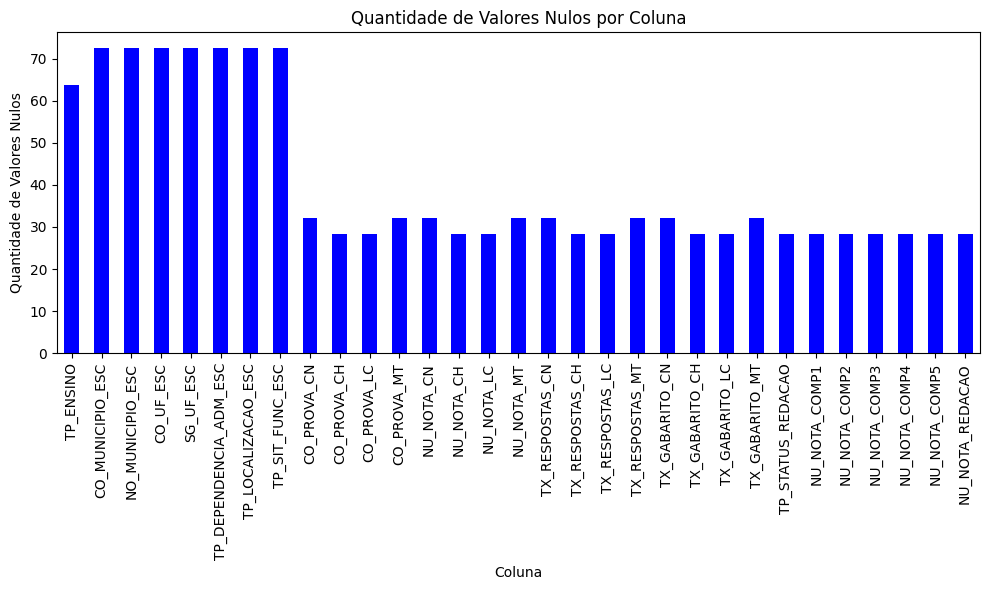

In [18]:
# Exibe a quantidade de valores nulos de cada coluna
null_counts = raw_df.isnull().sum().apply(get_percentage)
null_counts = null_counts[null_counts > 0]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='blue')
plt.xlabel('Coluna')
plt.ylabel('Quantidade de Valores Nulos')
plt.title('Quantidade de Valores Nulos por Coluna')

# Exibir o gráfico
plt.tight_layout()
plt.show()

TP_COR_RACA
Não Declarado     1.866083
Branca           41.082792
Preta            11.749415
Parda            42.830812
Amarela           1.900144
Indígena          0.570754
Name: count, dtype: float64


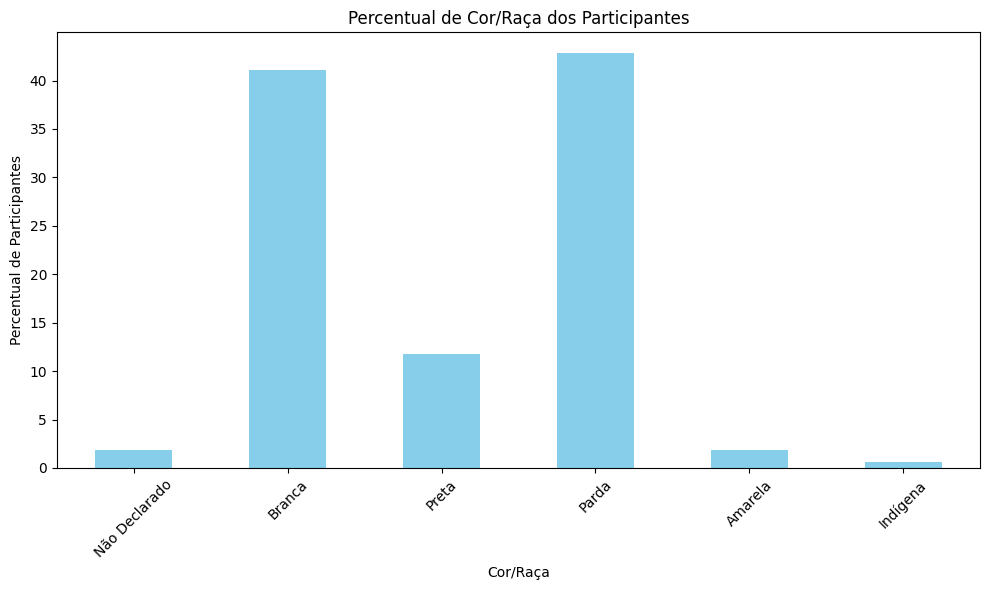

In [24]:
# Calcular a frequência de cor/raça dos participantes
cor_raca_dict = {
    0: 'Não Declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena'
}
cor_raca_counts = raw_df['TP_COR_RACA'].value_counts().sort_index().apply(get_percentage)
cor_raca_counts.index = cor_raca_counts.index.map(cor_raca_dict)

print(cor_raca_counts)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
cor_raca_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cor/Raça')
plt.ylabel('Percentual de Participantes')
plt.title('Percentual de Cor/Raça dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TP_SEXO
F    61.002732
M    38.997268
Name: count, dtype: float64


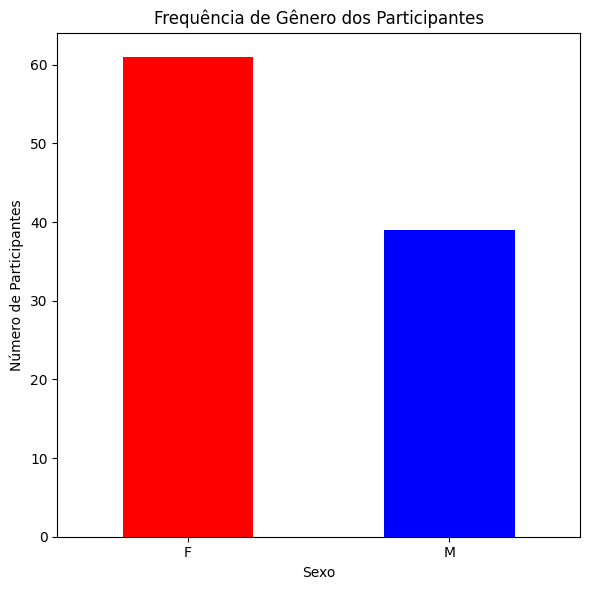

In [20]:
sexo_counts = raw_df['TP_SEXO'].value_counts().apply(get_percentage)
print(sexo_counts)

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
sexo_counts.plot(kind='bar', color=['red', 'blue'])
plt.xlabel('Sexo')
plt.ylabel('Percentual de Participantes')
plt.title('Percentual de Gênero dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

TP_ESCOLA
Não Respondeu    62.096657
Pública          31.798665
Privada           6.104678
Name: count, dtype: float64


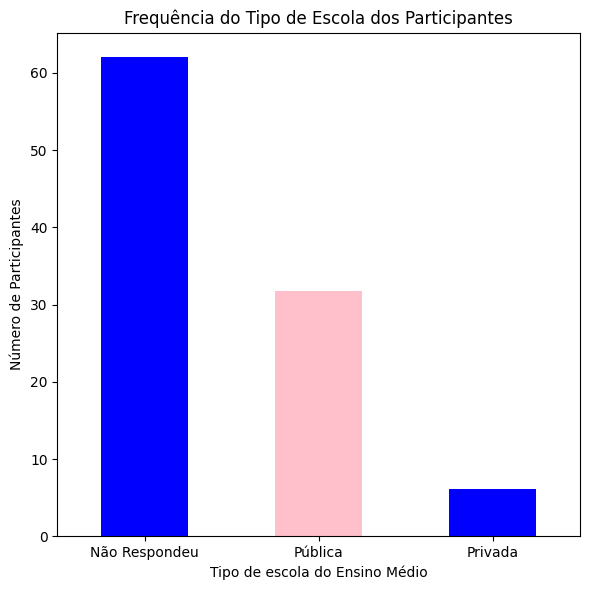

In [21]:
escola_dict = {
    1: 'Não Respondeu',
    2: 'Pública',
    3: 'Privada',
}

escola_counts = raw_df['TP_ESCOLA'].value_counts().sort_index().apply(get_percentage)
escola_counts.index = escola_counts.index.map(escola_dict)
print(escola_counts)

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
escola_counts.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Tipo de escola do Ensino Médio')
plt.ylabel('Percentual de Participantes')
plt.title('Percentual do Tipo de Escola dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Q010
Não                    51.398476
Sim, um                38.092923
Sim, dois               9.135052
Sim, três               1.124103
Sim, quatro ou mais     0.249446
Name: count, dtype: float64


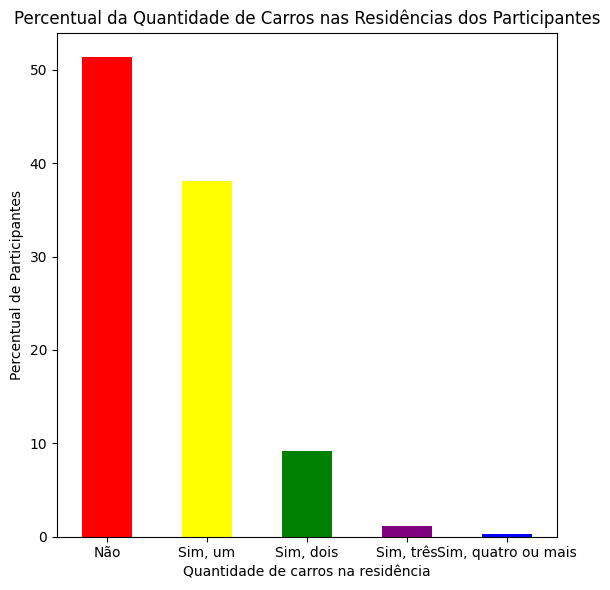

In [22]:
carro_dict = {
    'A': 'Não',
    'B': 'Sim, um',
    'C': 'Sim, dois',
    'D': 'Sim, três',
    'E': 'Sim, quatro ou mais',
}

carro_counts = raw_df['Q010'].value_counts().sort_index().apply(get_percentage)
carro_counts.index = carro_counts.index.map(carro_dict)
print(carro_counts)

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
carro_counts.plot(kind='bar', color=['red', 'yellow', 'green', 'purple', 'blue'])
plt.xlabel('Quantidade de carros na residência')
plt.ylabel('Percentual de Participantes')
plt.title('Percentual da Quantidade de Carros nas Residências dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Q025
Não     9.389043
Sim    90.610957
Name: count, dtype: float64


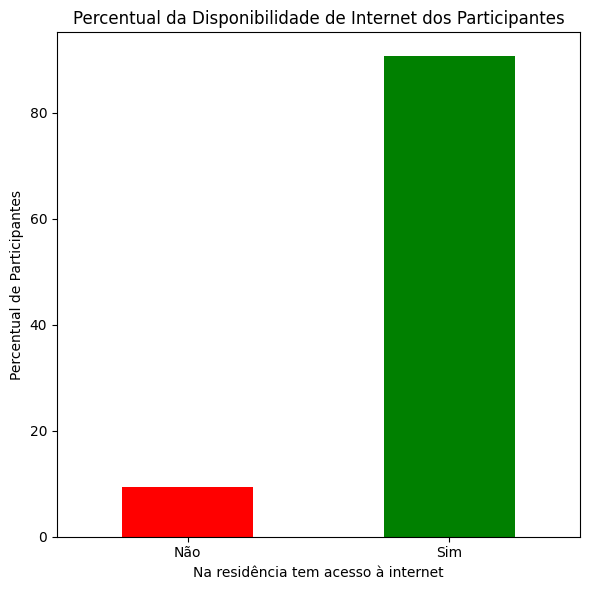

In [23]:
internet_dict = {
    'A': 'Não',
    'B': 'Sim',
}

internet_counts = raw_df['Q025'].value_counts().sort_index().apply(get_percentage)
internet_counts.index = internet_counts.index.map(internet_dict)
print(internet_counts)

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
internet_counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Na residência tem acesso à internet')
plt.ylabel('Percentual de Participantes')
plt.title('Percentual da Disponibilidade de Internet dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##**3. Data preparation (Preparação dos dados)**

In [10]:
# Dada as colunas de interesse, selecionamos apenas as colunas que serão usadas no projeto
columns_of_interest = ['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ESCOLA', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']

DF = raw_df.filter(columns_of_interest)

del raw_df

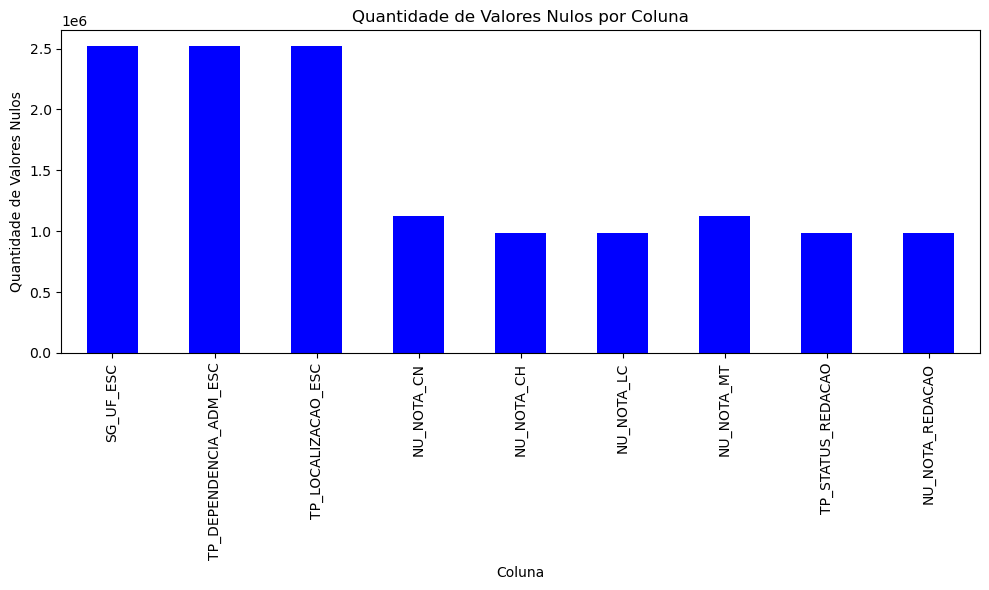

In [11]:
# Exibe a quantidade de valores nulos de cada coluna
null_counts = DF.isnull().sum()
null_counts = null_counts[null_counts > 0]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='blue')
plt.xlabel('Coluna')
plt.ylabel('Quantidade de Valores Nulos')
plt.title('Quantidade de Valores Nulos por Coluna')

# Exibir o gráfico
plt.tight_layout()
plt.show()

# Dadas algumas colunas com muitos valores nulos, removeremos estas para evitar enviesamentos (bias)
columns_to_remove = ['SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC']
DF.drop(columns=columns_to_remove, inplace=True)

In [12]:
# Adiciona uma coluna com a média das notas de cada participante
DF['NU_NOTA_MEDIA'] = (DF['NU_NOTA_CN'] + DF['NU_NOTA_CH'] + DF['NU_NOTA_LC'] + DF['NU_NOTA_MT'] + DF['NU_NOTA_REDACAO']) / 5

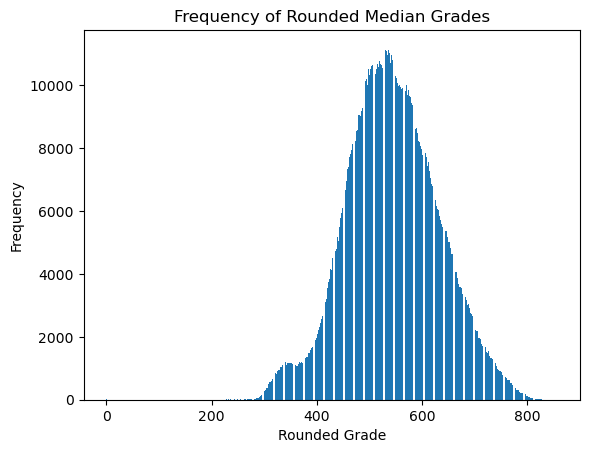

In [13]:
# Exibe a distribuição das notas médias
filtered_df = DF[DF['NU_NOTA_MEDIA'].notna()]
grade_counts = filtered_df['NU_NOTA_MEDIA'].round().astype(int).value_counts().sort_index()
plt.bar(grade_counts.index, grade_counts.values)

plt.xlabel('Rounded Grade')
plt.ylabel('Frequency')
plt.title('Frequency of Rounded Median Grades')

plt.show()

In [14]:
# Encontra a nota de corte das segmentações pré definidas
top_1_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.99)
print('Nota de corte do top 1%: ' + str(top_1_percent_grade))

top_25_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.75)
print('Nota de corte do top 25%: ' + str(top_25_percent_grade))

top_50_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.5)
print('Nota de corte do top 50%: ' + str(top_50_percent_grade))

top_75_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.25)
print('Nota de corte do top 75%: ' + str(top_75_percent_grade))

lowest_valid_grade = filtered_df['NU_NOTA_MEDIA'].round().loc[lambda x: x > 0].min()
print("Nota de corte do top 100%: " + str(lowest_valid_grade))

Nota de corte do top 1%: 750.0
Nota de corte do top 25%: 602.0
Nota de corte do top 50%: 541.0
Nota de corte do top 75%: 485.0
Nota de corte do top 100%: 56.0


In [15]:
# Adiciona uma coluna com o valor categórico de acordo com a nota média

# A -> 1%
# B -> 2% - 25%
# C -> 26% - 50%
# D -> 51% - 75%
# E -> 76% - 100%

def map_num_grade_to_categorical(grade):
  if grade >= top_1_percent_grade:
    return 'A'
  elif grade >= top_25_percent_grade:
    return 'B'
  elif grade >= top_50_percent_grade:
    return 'C'
  elif grade >= top_75_percent_grade:
    return 'D'
  elif grade >= lowest_valid_grade:
    return 'E'
  else:
    return 'F'

DF['TP_NOTA_MEDIA'] = DF['NU_NOTA_MEDIA'].round().apply(map_num_grade_to_categorical)


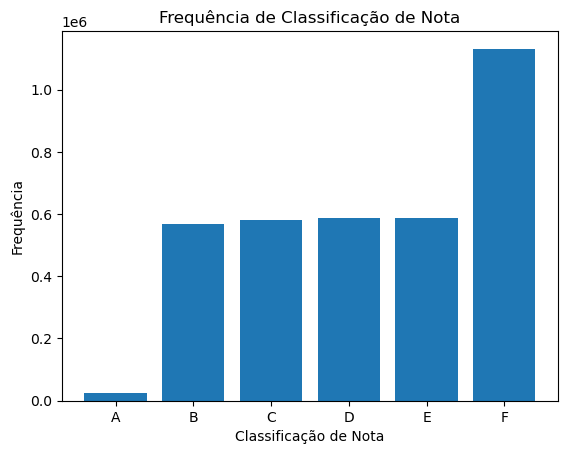

In [16]:
# Exibe a distribuição das classificações de notas
grade_counts = DF['TP_NOTA_MEDIA'].value_counts().sort_index()

plt.bar(grade_counts.index, grade_counts.values)

plt.xlabel('Classificação de Nota')
plt.ylabel('Frequência')
plt.title('Frequência de Classificação de Nota')

plt.show()

In [17]:
columns_to_remove = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'NU_NOTA_MEDIA']
DF.drop(columns=columns_to_remove, inplace=True)


##**4. Modeling (Modelagem)**


1.   Explicar brevemente como você elaborou o modelo para o seus dados.
2.   Se a intenção for fazer uma análise comparativa entre algorimtmos criar células markdown ou comentários explicitando onde começa o código referente a cada algoritmo.
3. Explicar (quando pertinente) o fluxo de dados, ou seja como você organizou os dados em treino e teste, como foi o ajuste de parâmetros e eventuais decisões de projeto referentes a modelagem de dados. **Que ajudem a compreender o código.**

O relatório deverá conter essas informações, mas sob a **perspectiva do projeto de dados**

In [18]:
# Criar data frame menor
import gc

minor_DF = DF.head(100).copy()
del DF

gc.collect()

42289

In [19]:
# Trocar valores de todas as colunas

for col in minor_DF.columns:
    if (len(col) > 4):
      initials = ''.join([word[0] for word in col.split('_')])
      minor_DF[col] = minor_DF[col].apply(lambda x: f'{initials}:{x}')
    else:
      minor_DF[col] = minor_DF[col].apply(lambda x: f'{col}:{x}')

print(minor_DF)

   TP_FAIXA_ETARIA TP_SEXO TP_ESTADO_CIVIL TP_COR_RACA TP_ESCOLA  \
0           TFE:14    TS:M           TEC:2       TCR:2      TE:1   
1           TFE:14    TS:M           TEC:2       TCR:1      TE:1   
2            TFE:5    TS:F           TEC:1       TCR:2      TE:1   
3            TFE:6    TS:M           TEC:1       TCR:3      TE:1   
4            TFE:4    TS:M           TEC:0       TCR:3      TE:1   
..             ...     ...             ...         ...       ...   
95          TFE:13    TS:M           TEC:1       TCR:3      TE:1   
96          TFE:10    TS:F           TEC:1       TCR:3      TE:1   
97           TFE:3    TS:F           TEC:1       TCR:3      TE:2   
98          TFE:14    TS:F           TEC:1       TCR:3      TE:1   
99          TFE:15    TS:M           TEC:1       TCR:3      TE:1   

   TP_PRESENCA_CN TP_PRESENCA_CH TP_PRESENCA_LC TP_PRESENCA_MT    Q001  ...  \
0           TPC:0          TPC:0          TPL:0          TPM:0  Q001:A  ...   
1           TPC:0        

In [20]:
# Importa a biblioteca mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [21]:
lines = []
indexes = []

# Iterar pelas linhas do DataFrame
for index, row in minor_DF.iterrows():
    # Converter a linha em um array usando tolist()
    line = row.tolist()
    # Adicionar o array à lista de arrays
    lines.append(line)
    indexes.append(str(index))

print(indexes)
print(lines)


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
[['TFE:14', 'TS:M', 'TEC:2', 'TCR:2', 'TE:1', 'TPC:0', 'TPC:0', 'TPL:0', 'TPM:0', 'Q001:A', 'Q002:A', 'Q003:A', 'Q004:B', 'Q005:3', 'Q006:B', 'Q007:B', 'Q008:B', 'Q009:B', 'Q010:B', 'Q011:B', 'Q012:B', 'Q013:A', 'Q014:B', 'Q015:B', 'Q016:B', 'Q017:A', 'Q018:A', 'Q019:A', 'Q020:A', 'Q021:A', 'Q022:A', 'Q023:A', 'Q024:A', 'Q025:A', 'TNM:F'], ['TFE:14', 'TS:M', 'TEC:2', 'TCR:1', 'TE:1', 'TPC:0', 'TPC:0', 'TPL

In [22]:
transaction_encoder = TransactionEncoder()
transaction_array = transaction_encoder.fit(lines).transform(lines)
transaction_dataframe = pd.DataFrame(transaction_array, columns=transaction_encoder.columns_, index=indexes)

print("The transaction dataframe is:")
print(transaction_dataframe)

The transaction dataframe is:
    Q001:A  Q001:B  Q001:C  Q001:D  Q001:E  Q001:F  Q001:G  Q001:H  Q002:A  \
0     True   False   False   False   False   False   False   False    True   
1    False   False   False    True   False   False   False   False   False   
2    False   False   False   False    True   False   False   False   False   
3    False   False    True   False   False   False   False   False    True   
4    False   False   False    True   False   False   False   False   False   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
95   False   False    True   False   False   False   False   False   False   
96   False   False   False   False    True   False   False   False   False   
97   False   False   False   False    True   False   False   False   False   
98   False    True   False   False   False   False   False   False   False   
99   False   False    True   False   False   False   False   False   False   

    Q002:B  ...  TNM:E  TNM:F  TP

In [23]:
# Aplicamos o algoritmo FP-Growth para encontrar conjuntos frequentes
frequent_itemsets = fpgrowth(transaction_dataframe, min_support=0.5, use_colnames=True)

print(frequent_itemsets)

       support                                           itemsets
0         0.99                                           (Q017:A)
1         0.96                                           (Q018:A)
2         0.96                                           (Q012:B)
3         0.92                                           (Q023:A)
4         0.90                                           (Q021:A)
...        ...                                                ...
20130     0.50           (Q008:B, Q011:A, Q018:A, Q012:B, Q019:B)
20131     0.50   (Q015:A, Q017:A, Q008:B, Q011:A, Q012:B, Q019:B)
20132     0.50   (Q015:A, Q008:B, Q011:A, Q018:A, Q012:B, Q019:B)
20133     0.50   (Q017:A, Q008:B, Q011:A, Q018:A, Q012:B, Q019:B)
20134     0.50  (Q015:A, Q017:A, Q008:B, Q011:A, Q018:A, Q012:...

[20135 rows x 2 columns]


##**5. Evaluation (Validação)**


**Prevenção de falhas**
(Opcional)


Se o seu dataset for muito grande ou muito grande, ou for muito custoso rodar os algoritmos é indicado que tenha uma célula na qual os resultados parciais possam ser salvos. Evitando, assim ter que re-rodar os algoritmos novamente.